# Imports and Catalogues

In [ ]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.table import join
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.coordinates import SkyCoord
from scipy.optimize import linear_sum_assignment
import all_fctns

def refresh_module():
    import importlib
    import all_fctns
    importlib.reload(all_fctns)
    
SAMI_Target_catalogues = ("InputCatGAMADR3.fits", "InputCatClustersDR3.fits", "InputCatFiller.fits")
SAMI_regions = {0: "GAMA", 1: "Clusters", 2: "Filler"}

Source_dir ="C:\\Users\\mspan\\OneDrive - The University of Sydney (Students)\\Honours\\Honours Project\\"
catalogue_filepath = Source_dir + "Catalogues\\"
SAMI_regions = ("Cluster", "Filler", "GAMA")
SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
SAMI_SFR_catalogue = "AR2022_SAMI_DR3_Mstar_SFR_GSWL_rescaled.fits"
SAMI_AGN_summary_catalogue = "Crossmatched\\SAMI_AGN_matches.fits"
SAMI_cubeobs_catalogue = "CubeObs.fits"

shared_catalogue_filepath = Source_dir +  "SAMI_TOOLS_SMC_MSPA4681\\shared_catalogues\\"
gassig_statistics_catalogue = "gassig_statistics.fits"




with fits.open(catalogue_filepath + "\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_SFR_catalogue) as SAMI_SFR_hdul:
    SAMI_SFR_table_hdu = Table(SAMI_SFR_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_cubeobs_catalogue) as SAMI_CubeObs_hdul:
    SAMI_CubeObs_table_hdu =  Table(SAMI_CubeObs_hdul[1].data)

with fits.open(shared_catalogue_filepath + gassig_statistics_catalogue) as gassig_statistics_hdul:
    gassig_statistics_table = Table(gassig_statistics_hdul[1].data)

# sdss gal spec lines
with fits.open(Source_dir + "galSpecLine-dr8.fits") as sdss_galspec_hdul:
    sdss_galspec_table = Table(sdss_galspec_hdul[1].data)


# Spectrum Comparison Plot

<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:35: SyntaxWarning: invalid escape sequence '\A'
C:\Users\mspan\AppData\Local\Temp\ipykernel_17300\2890389265.py:35: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Wavelength ($\AA$)')


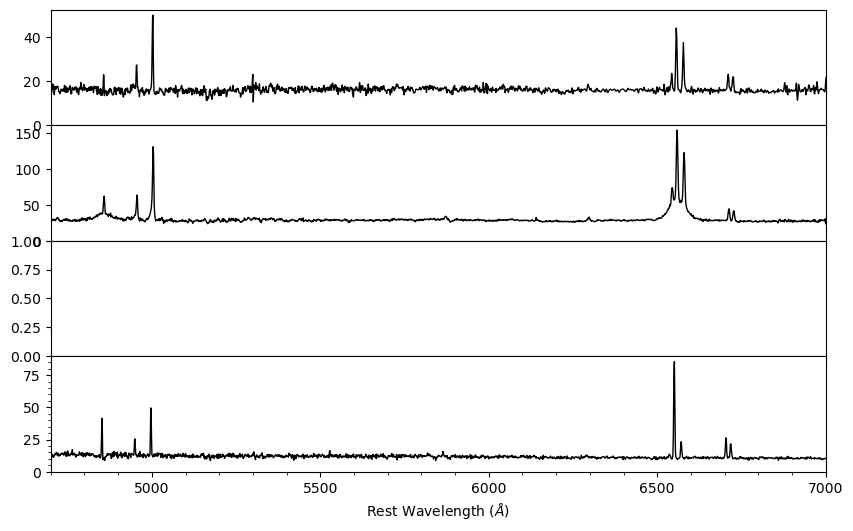

In [185]:
# get SDSS spectra
HII_spectra_catid = 9163
Seyfert2_spectra_catid = 376478
Seyfert1_spectra_catid = 376679

flux_quality = 1 # 1 for raw, 2 for fit

HII_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{HII_spectra_catid}.csv", delimiter=',', skiprows=1)
HII_spectra_wavelengths = HII_spectra[:, 0] / (1+ Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == HII_spectra_catid])
HII_spectra_flux = HII_spectra[:, flux_quality]

Seyfert2_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert2_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert2_spectra_wavelengths = Seyfert2_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert2_spectra_catid])
Seyfert2_spectra_flux = Seyfert2_spectra[:, flux_quality]

Seyfert1_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert1_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert1_spectra_wavelengths = Seyfert1_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert1_spectra_catid])
Seyfert1_spectra_flux = Seyfert1_spectra[:, flux_quality]

fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0) # Set vertical spacing to 0
axs[3].minorticks_on()

axs[0].plot(Seyfert2_spectra_wavelengths, Seyfert2_spectra_flux, 'k', label='Seyfert 2 Spectrum', lw=1)

axs[1].plot(Seyfert1_spectra_wavelengths, Seyfert1_spectra_flux, 'k', label='Seyfert 1 Spectrum', lw=1)

axs[3].plot(HII_spectra_wavelengths, HII_spectra_flux,  'k', label='HII Spectrum', lw=1)

for ax in axs:
    ax.set_ylim(0, ax.get_ylim()[1])
    

plt.xlim(4700, 7000)
plt.xlabel('Rest Wavelength ($\AA$)')
plt.show()
# plt.show()

# BPT Diagram

C:\Users\mspan\AppData\Local\Temp\ipykernel_17300\2756628253.py:15: RuntimeWarning: invalid value encountered in divide
  sn_mask = (halpha/halpha_err > sn_lim) & (hbeta/hbeta_err > sn_lim) & (OIII/OIII_err > sn_lim) & (NII/NII_err > sn_lim)
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:36: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:26: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3


287112


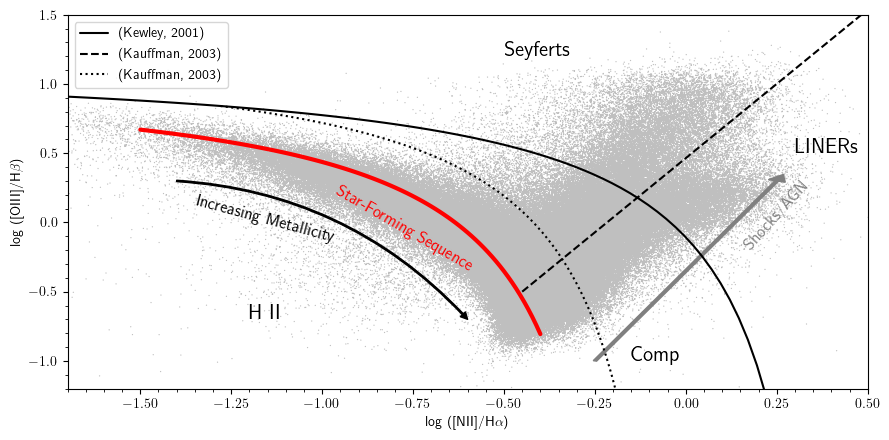

In [254]:
refresh_module()

fig, ax = plt.subplots(figsize=(9, 4.5))
plt.rcParams['text.usetex'] = True

label_fontsize = 12
regionlabel_fontsize = 15
# SDSS points
sn_lim = 5
halpha, halpha_err = sdss_galspec_table['H_ALPHA_FLUX'], sdss_galspec_table['H_ALPHA_FLUX_ERR']
hbeta, hbeta_err = sdss_galspec_table['H_BETA_FLUX'], sdss_galspec_table['H_BETA_FLUX_ERR']
OIII, OIII_err = sdss_galspec_table['OIII_5007_FLUX'], sdss_galspec_table['OIII_5007_FLUX_ERR']
NII, NII_err = sdss_galspec_table['NII_6584_FLUX'], sdss_galspec_table['NII_6584_FLUX_ERR']

sn_mask = (halpha/halpha_err > sn_lim) & (hbeta/hbeta_err > sn_lim) & (OIII/OIII_err > sn_lim) & (NII/NII_err > sn_lim)
print(np.sum(sn_mask))

log_NII_halpha = np.log10( NII[sn_mask] / halpha[sn_mask])
log_OIII_hbeta = np.log10( OIII[sn_mask] / hbeta[sn_mask])

plt.rcParams['lines.solid_capstyle'] = 'round'
def expand(x, y, gap=1e-7):
    add = np.tile([0, gap, np.nan], len(x))
    x1 = np.repeat(x, 3) + add
    y1 = np.repeat(y, 3) + add
    return x1, y1

x1 = log_NII_halpha
y1 = log_OIII_hbeta
# plt.scatter(log_NII_halpha, log_OIII_hbeta, s=9, lw=0, alpha=0.2)
ax.plot(*expand(x1, y1), lw=1, color="grey", alpha=0.5)



# plt.scatter(data['log_NII_Ha'], data['log_OIII_Hb'], s=9, lw=0, alpha=0.5)

all_fctns.plot_BPT_lines(ax, 'N II', AGN_cutoffs=False, region_labels=False)

# shock path
plt.arrow(-0.25, -1, 0.5, 1.3, width=0.01, head_width=0.05, head_length=0.05, fc='grey', ec='grey')
plt.text(0.15, -0.2, 'Shocks/AGN', fontsize=label_fontsize, rotation=48, c='grey')

# star-forming sequence
x = np.linspace(-1.5, -0.4, 100)
starforming_sequence = lambda xbpt: 0.61 / (xbpt+ 0.08) +1.10
plt.plot(x, starforming_sequence(x), 'r-', lw=3)
plt.text(-0.97, -0.36, 'Star-Forming Sequence', c='r', rotation=-30, fontsize=label_fontsize)


# increasign metallicity path
# Draw a curved arrow
start_x, start_y = -1.4, 0.3
end_x, end_y = -0.6, -0.7
ax.annotate(
    "", 
    xy=(end_x, end_y),
    xycoords='data',
    xytext=(start_x, start_y),
    textcoords='data',
    arrowprops=dict(
        color="k",
        connectionstyle="arc3,rad=-0.2",  # Curved connection with radius
        width=1,
        headwidth=5,
        headlength=5
    )
)
# plt.arrow(-1.5, 0.2, 0, -1, width=0.01, head_width=0.03, head_length=0.05, fc='black', ec='black')
plt.text(-1.35, -0.15, 'Increasing Metallicity', fontsize=label_fontsize, rotation=-15)

# region labels
ax.text(-0.5, 1.2, 'Seyferts', size = regionlabel_fontsize)
ax.text(0.3, 0.5, 'LINERs', size=regionlabel_fontsize)
ax.text(-0.15, -1.0, 'Comp', size=regionlabel_fontsize)
ax.text(-1.2, -0.7, 'H II', size=regionlabel_fontsize)


ax.grid(False)
ax.minorticks_on()
plt.ylim(-1.2, 1.5)
plt.xlim(-1.7, 0.5)
# plt.xticks(-1.75, 0.5, step=0.05)







plt.tight_layout()
plt.show()

save_figure = False
if save_figure:
    figname = 'ExampleBPTDiagram.png'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname)
    print(f"Figure saved to {savepath+ figname}")
